# importacoes

In [ ]:
import cv2;
import numpy as np;
from matplotlib import pyplot as grafico;

In [ ]:
imagem = cv2.imread("gatoFofo.jpeg");
imagemBMP = cv2.imread("Coruja.bmp"); # Carrega a imagem BMP em tons de cinza

imagemBtPreto = cv2.imread("BotoesPreto.jpg");
imagemBtVermelho = cv2.imread("BotoesVermelho.jpg");
moedasImg = cv2.imread('moedas.jpg')
salPimentaImg = cv2.imread('salPimenta.jpeg')
estacionamentoImg = cv2.imread('estacionamento.png', 0)
luaImg = cv2.imread('lua.jpg', 0)
radiografiaImg = cv2.imread('radiografia.jpeg', 0)

# Pré *processamento*


Na visao computacional, é util realizar etapas de pre processamento para facilitar a segmentacao da imagem em etapas posteriores, realçando-os

Algo muito util é mudar os valores dos pixels, que sao tratados como uma matriz

In [ ]:
valorPixel = imagem[100,150];
print(valorPixel); # Printa o valor do pixel na posição 100,150

# a primeira posicao da resposta é o valor do pixel azul, a segunda é o verde e a terceira é o vermelho

[40 49 58]


Converter a imagem pra cinza faz com quie a representacao fique menor, apenas com um valor

In [ ]:
imagem = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY); # Converte a imagem para escala de cinza
valorPixel = imagem[100,150];
print(valorPixel); # Printa o valor do pixel na posição 100,150

# o retorno é um unico valor que representa a intensidade de cinza do pixel

47


Podemos tambem obter a intensidade de cor em um unico canal (nesse caso por estar em escala de cinza, nao é possivel)
onde:

0 - red |
1 - green |
2 - blue |

In [ ]:
valorPixel = imagem[100, 150]
print(valorPixel); # Printa o valor do pixel na posição 150,150 do canal azul

47


Para alterar um valor, basta adicinar valores na matriz

In [ ]:
imagem = cv2.imread("gatoFofo.jpeg");
print (imagem[100, 150])
imagem[100, 150] = [255, 255, 255] # Muda o valor do pixel na posição 100,150 para branco
print (imagem[100, 150])


[40 49 58]
[255 255 255]


##### Acessando informacoes da imagem:

podemos por meio do openCv obter outras informacoes da imagem, tais elas:

Shape - Numero de linhas/colunas/canais de uma determinada imagem

In [ ]:
print(imagem.shape) # Printa a dimensão da imagem (altura, largura, canais de cor)

(217, 232, 3)


Size - quantidade de pixeis

In [ ]:
print(imagem.size) # Printa o número de pixels da imagem, dividir esse valor por 3 nos retorna quantas linhas e colunas tem a imagem

151032


### Histogramas


histogramas explicam a distribuicao de frequencia dos niveis de cinza em relacao ao numero de amostras, essa distrubuicao diz respeito a qualidade da imagem, principalmente no que diz respeito a luminosidade e constraste

In [ ]:
# Imagem binaria
imagemBMP = cv2.imread("Coruja.bmp", 0); # Carrega a imagem em escala de cinza

totalPixelsPreto = 0;
totalPixelsBranco = 0;

for x in range(0, 1000):
    for y in range(0, 1000):
        if imagemBMP[x, y] == 0:
            totalPixelsPreto += 1;
        else:
            totalPixelsBranco += 1;

print("Total de pixels pretos: ", totalPixelsPreto);
print("Total de pixels brancos: ", totalPixelsBranco);


Total de pixels pretos:  54859
Total de pixels brancos:  945141


o metodo utilizado é bom, porem a matplotlib possui a funçao '''hist''' que abstrai essas informacoes e ilustra em um histgrama de corem

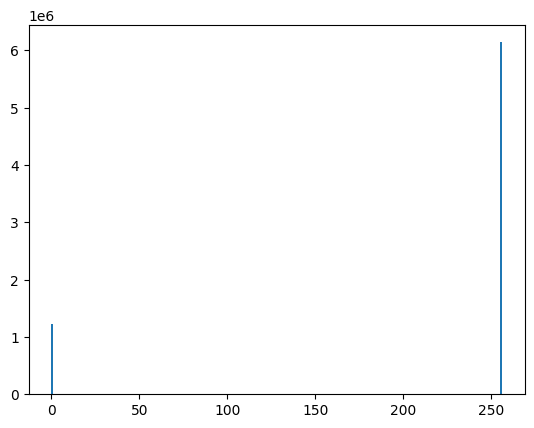

In [ ]:
# Ler importacoes para saber de onde vem cada funcao

grafico.hist(imagemBMP.ravel(), 255, [0, 256]) # Cria um histograma da imagem
# Paremetros da hist:
# 1 - Imagem a ser analisada
# 2 - Numero de elementos distintos que podem ser representados
# 3 - Intervalo entre os elementos ( varia de 0 a 255, ou seja 256 tonalidades)
# ravel transforma a matriz em um vetor
grafico.show()


Para imagens coloridas, podemos gerar 3 histogramas de cada canal

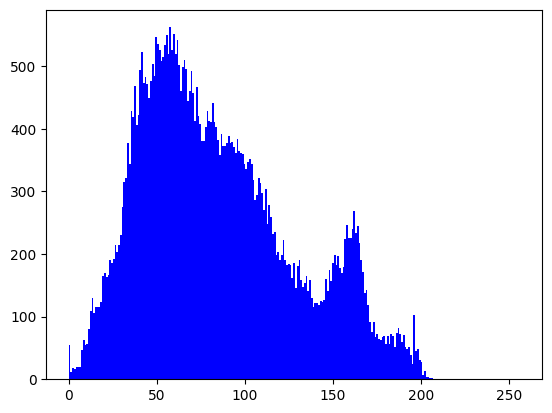

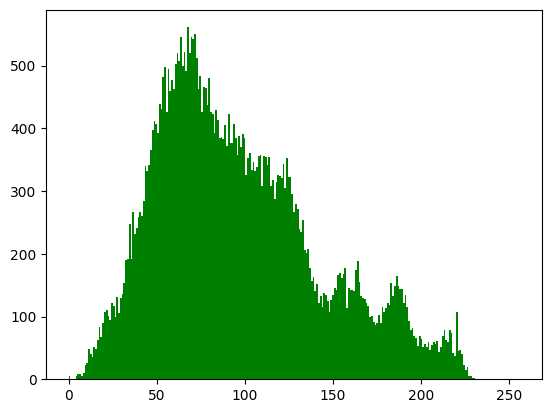

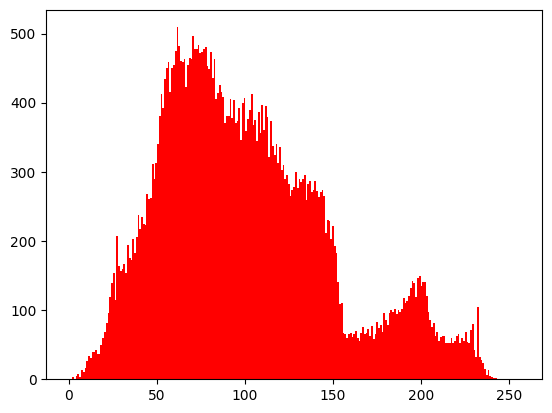

In [ ]:
azul, verde, vermelho = cv2.split(imagem); # Separa os canais de cor da imagem

grafico.hist(azul.ravel(), 255, [0, 256], color = 'b') # Cria um histograma do canal azul
grafico.figure() # Cria uma nova figura

grafico.hist(verde.ravel(), 255, [0, 256], color = 'g') # Cria um histograma do canal verde
grafico.figure() # Cria uma nova figura

grafico.hist(vermelho.ravel(), 255, [0, 256], color = 'r') # Cria um histograma do canal vermelho
grafico.show()

### Equalizaçao de Histograma

Equalizar um histograma é realçar um objeto de forma que ele fique mais nitido

um histograma mais a direita significa que a luminosidade esta mais forte
um histograma mais a a esquerda significa que esta com uma intensidade luminosa menor

imagens com baixo nivel de contraste apresentam menor nitides, sendo caracterizados por histogramas estreitos
imagens com constrastes altos, apresentam histogramas mais largos

as vezes a condicao da imagem impossibilita a obtencao de informaçoes, o objetivo da equalizaçao passa a ser distribuir esse esse histograma ( que teria regioes sem marcaçao) de forma a obter uma imagem mais nitida, com as tonalidades de cinza realmente variando de 0 a 255


na OpenCv existe a "equalizeHist" que permite equalizar histogramas das imagens

In [ ]:
imagemOriginal = cv2.imread("imagem1.jpg")
imagemCinza = cv2.cvtColor(imagemOriginal, cv2.COLOR_BGR2GRAY) # Converte a imagem para escala de cinza
imagemEqualizada = cv2.equalizeHist(imagemCinza) # Equaliza o histograma da imagem

cv2.imshow("Imagem Original", imagemOriginal)
cv2.imshow("Imagem Equalizada", imagemEqualizada)

grafico.hist(imagemOriginal.ravel(), 256, [0, 256], color = 'gray') # Cria um histograma da imagem original
grafico.figure()

grafico.hist(imagemEqualizada.ravel(), 256, [0, 256], color = 'yellow') # Cria um histograma da imagem equalizada

grafico.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


Fazer isso porem interfere na qualidade das cores da imagem, uma boa opçao é utilizar o HSV, porque assim podemos manter o HS(que representam a cor) e aplicar a logica somente no value, mantendo assim as caracteristicas das cores

### Transformaçoes Geometricas

Inverter/rotacionar/ajustar escala e perspectiva

In [ ]:
matriz = cv2.getRotationMatrix2D(
    (imagem.shape[1] / 2, imagem.shape[0] / 2), 90, 1 # Ponto central da imagem (largura, altura) | angulo de rotação | escala
)

In [ ]:
# Rotaciona a imagem
imagemRotacionada = cv2.warpAffine(
    imagem, # Imagem a ser rotacionada
    matriz, # Matriz de rotação
    (imagem.shape[1], imagem.shape[0]) # Tamanho da imagem
)

cv2.imshow("Imagem Rotacionada", imagemRotacionada)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Translação de imagem

totalLinhas, totalColunas = imagem.shape[:2] # Pega a altura e largura da imagem

matriz = np.float32([[1, 0, 100], [0, 1, 100]]) # Matriz de translação
imagemDeslocada = cv2.warpAffine(
    imagem, # Imagem a ser transladada
    matriz, # Matriz de translação
    (totalColunas, totalLinhas) # Tamanho da imagem
)

cv2.imshow("Imagem Deslocada", imagemDeslocada)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# Redimensionamento de imagens, o fx e fy são os fatores de escala
imagemModificada = cv2.resize(
    imagem, # Imagem a ser redimensionada
    None, fx=0.5, fy=0.5, # Fatores de escala
    interpolation= cv2.INTER_CUBIC, # Método de interpolação
)

cv2.imshow("Imagem Modificada", imagemModificada)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Ajustes de perspectiva, digamos que tenhamos uma imagem de um quadro torto e queremos endireitar
pontosIniciais = np.float32(
    [
        [189, 87], [459, 84], [192, 373], [484, 372]
    ]
)
pontosFinais = np.float32(
    [
        [0, 0], [500, 0], [0, 500], [500, 500]
    ]
)

matriz = cv2.getPerspectiveTransform(pontosIniciais, pontosFinais) # Matriz de transformação de perspectiva

imagemPerspectiva = cv2.warpPerspective(
    imagem, # Imagem a ser transformada
    matriz, # Matriz de transformação
    (imagem.shape[1], imagem.shape[0]) # Tamanho da imagem
)

cv2.imshow("Imagem Perspectiva", imagemPerspectiva)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Operaçoes Aritméticas:

Nos permite adicionar conteudos de imagens, em outras, ou mistura-los

Geralmente, para que as operacoes acotecam, é necessario que ambas as imagens tenham o mesmo tamanho de largura e altura

##### Adiçao:

Adicao consiste em somas os valores dos pixels de uma imagem com outra(s), resultando em uma nova imagem.  para isso usamos a ADD

In [ ]:
NovaImagem = cv2.add(imagemBtPreto, imagemBtVermelho) # Soma as duas imagens
cv2.imshow("Nova Imagem", NovaImagem)

cv2.waitKey(0)
cv2.destroyAllWindows()

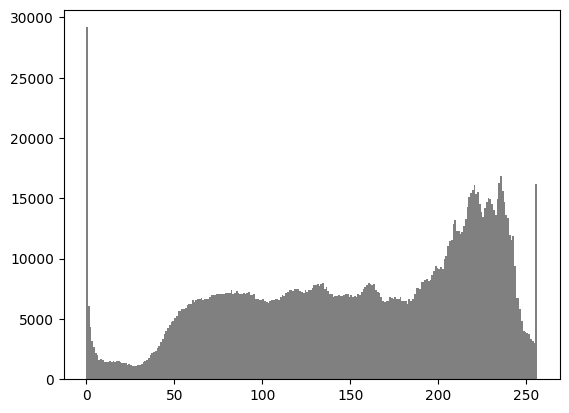

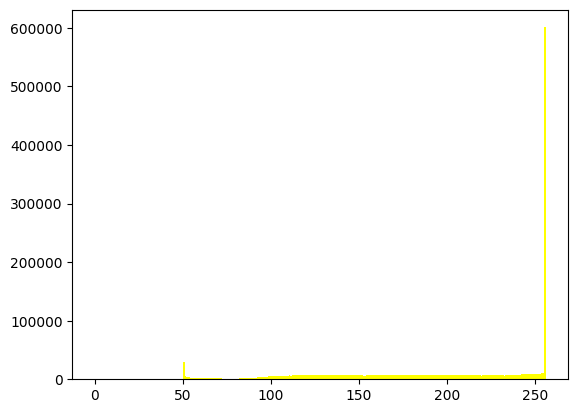

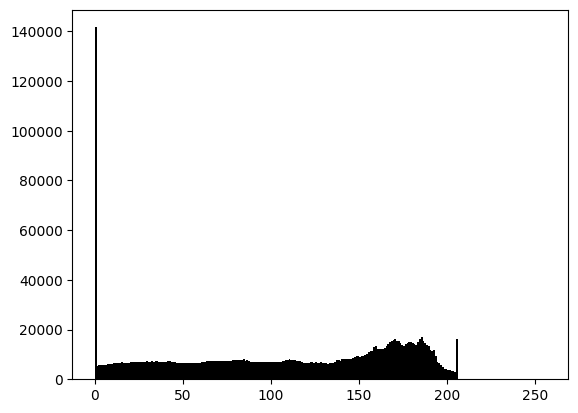

In [ ]:
# Contraste sendo alterado por meio da adicao

from matplotlib import pyplot as grafico

imagemOriginal = imagem;
imagemClara = cv2.add(imagemOriginal, 50) # Adiciona 50 a todos os pixels da imagem
imagemEscura = cv2.add(imagemOriginal, -50) # Subtrai 50 de todos os pixels da imagem

cv2.imshow("Imagem Original", imagemOriginal)
cv2.imshow("Imagem Clara", imagemClara)
cv2.imshow("Imagem Escura", imagemEscura)

grafico.hist(imagemOriginal.ravel(), 256, [0, 256], color = 'gray') # Cria um histograma da imagem original
grafico.figure()

grafico.hist(imagemClara.ravel(), 256, [0, 256], color = 'yellow') # Cria um histograma da imagem clara
grafico.figure()

grafico.hist(imagemEscura.ravel(), 256, [0, 256], color = 'black') # Cria um histograma da imagem escura

grafico.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

#### Subtracao

Nesse método nos permite ter a diferenca de uma imagem para outra, isso é util para visualizar objetos em movimento entre duas imagens por exemplo

In [ ]:
imagemSubtraida = cv2.subtract(imagemBtVermelho, imagemBtPreto) # Subtrai as duas imagens

cv2.imshow("Imagem Subtraida", imagemSubtraida)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### Mistura

A opcao de misturar junta as duas imagens considerando um peso

In [ ]:
imagemMisturada = cv2.addWeighted(
    imagemBtPreto, 0.2, imagemBtVermelho, 1.0, 0 # Mistura as duas imagens
)

cv2.imshow("Imagem Misturada", imagemMisturada)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### Multiplicacao

realiza um produto escalar estre as posicoes equivalentes na matriz

##### Divisao

Util para ajuste de contraste e para discriminar uma imagem da outra, se as imagens forem identicas o valor resultando que representa cada pixel deve ser 1

Essa funcao é **relativamente** pesada, entao nao compensa muito utiliza-la em relacao a subtraçao


(ambas as funçoes nao sao muito utilizadas)



### Ruidos

Ruidos sao resultados de operacoes realizadas com a imagem ou problemas de captura. Imagens com ruidos sao um impecilho para o tratamento dos dados

os ruidos podem vir de

* Capturas
* Amostragem (representacao digital nao correponde a verdadeira imagem analogica)
* Processamento
* Codificacao de imagem (geralmente quando compactam uma imagem)
* Oclusao de cena (objeto desejado interrompido por outro na frente)
* Ruido sal e pimenta (ruido causado pela adicao de pixeis aleatorios pretos ou brancos na imagem, intensos ou fracos)
* Ruido Gaussiano
* Imagens binarias (geralmente quando passam pelo processo de binarizaçao, gera ruidos)

# Filtros

O objetivo desse capitulo é a aplicaçao de filtros

* Basicamente os filtros que veremos sao chamados de filtros espaciais, que sao matrizes que percorrem toda a imagem alterando os valores dos pixels, chamaremos essas matrizes de máscaras ou nucleos

* o processedimento de passar a mascara sobre a imagem é chamado de **convoluçao**

* Ao utilizarmos a convoluçao aplicamos a mascara em um pixel alvo, os pixel ao redor sao chamados de vizhança, assim, em cada iteraçao da convoluçao a mascara sobrepoe o pixel alvo

filtros podem ser **lineares ou nao lineares**

* Os lineares sao mais comuns, eles usam mascaras que realizam somas ponderadas das intensidades dos pixels ao longo da imagem, suavizando e realçando detalhes e minimizam efeitos de ruido, sem alterar o nivel medio de cinza na imagem

* Os nao lineares realizam somas nao ponderadas. podendo assim alterar o nivel medio de cinza na imagem, destacando bordas, linhas e manchas

(detalhe que os filtros sao aplicados na escala de cinza da imagem)


Filtros tambem podem ser **passa-baixas ou passa-altas** que refere a frequencia que será filtrada

* Um filtro passa-baixas atenua as altas frequencias, suavizando a imagem atuenuando as regioes que representam bordas ou contornos.

* Passa-altas atenua as baixas frequencias, representando as regioes de borda ou contornos

# Filtro Média

* linear
* passa-baixas
(ou seja, para suavizar imagem)

ele substitui cada pixel, pelo valor médio de sua vizinhança, quanto maior a ordem da matriz que representa a máscara, maior será o numero de pixels vizinhos considerados, logo mais intenso ficará o efeito


no opencv temos a funçao, Blur, que serve para aplicaçao desse filtro

In [ ]:
imagemTratada = cv2.blur(moedasImg, (5, 5))

cv2.imshow('Imagem Original', moedasImg)
cv2.imshow('Imagem Tratada', imagemTratada)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Filtro Gaussiano

* Filtro linear
* Passa-baixas
* opencv: GaussianBlur
* é recomendada que seja uma matriz quadrada de numeros impares de linha e coluna
* Aplica-se uma fórmula, de gaussiana para cada elemento da matriz de convoluçao

In [ ]:
imagemTratada = cv2.GaussianBlur(moedasImg, (5, 5), 3)
# imagem a ser tratada,
# tamanho da matriz de convolução,
# intensidade do desfoque (desvio padrão)

cv2.imshow('Imagem Original', moedasImg)
cv2.imshow('Imagem Tratada', imagemTratada)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Filtro mediana
* nao linear
* ótimo para ruidos sal-pimenta pois preserva contornos ou bordas (alta-frequencia), nao tem como quantificar enquanto frquencia e é chamado de Edge-preserving smoothing, ou seja, tecnicas de tatamento de imagem capaz de suaviar preservando bordas ou cornos
* Aqui, na convoluçao, pega-se todos os valores daquela matriz, e seleciana para o pixel-alvo o valor da mediana, isso retira os problemas de sal e pimenta

In [ ]:
imagemTratada = cv2.medianBlur(salPimentaImg, 5)

cv2.imshow('Imagem Original', salPimentaImg)
cv2.imshow('Imagem Tratada', imagemTratada)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Filtro bilateral
* preserva bem os detalhes suavizando a imagem
* Preserva bastante as bordas
* Possui dois elementos principais, sigma space e sigma color, o sigma space diz o quanto a proximidade influenciara no alvo, ou seja, se os pixeis mais longes influenciarao mais ou menos, o sigma color significa que as cores proximas a aquela determinada cor influenciará a aplicaçao do filtro

In [ ]:
imagemTratada = cv2.bilateralFilter(moedasImg, 9, 75, 75)
# imagem a ser tratada,
# tamanho da matriz de convolução,
# intensidade do filtro (sigmaSpace),
# intensidade do filtro (sigmaColor)

cv2.imshow('Imagem Original', moedasImg)
cv2.imshow('Imagem Tratada', imagemTratada)

cv2.waitKey(0)
cv2.destroyAllWindows()


# Operador de Sobel
* realça contornos (linhas horizontais e verticais mais escuras que o fundo)
* nao linear

In [ ]:
sobelX = cv2.Sobel(estacionamentoImg, cv2.CV_8U, 1, 0, ksize=3)
# imagem a ser exibida,
# como a imagem sera tratada, 8 bits sem sinal
# 1 para derivada em x, 0 para y
# tamanho da matriz de convoluçao
sobelY = cv2.Sobel(estacionamentoImg, cv2.CV_8U, 0, 1, ksize=3)

cv2.imshow('Original', estacionamentoImg)
cv2.imshow('Sobel X', sobelX)
cv2.imshow('Sobel Y', sobelY)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Operador laplaciano

* Popular
* Usado para realçar bordas (tambem é um filtro espacial) ele percorre a imagem alkterando o pixel-alvo pela média ponderada dos pixels vizinhos, e depois eleva ao quadrado o valor obtido
* Laplaciano tende a produzir bordas mais finas, porem pode ser sensivel a ruidos

In [ ]:
imagemTratada = cv2.Laplacian(estacionamentoImg, cv2.CV_8U)

cv2.imshow('Original', estacionamentoImg)
cv2.imshow('Laplacian', imagemTratada)

cv2.waitKey(0)
cv2.destroyAllWindows()

porem geralmente o filtro laplaciano é muito sensivel a ruido, para isso, geralmente passamos um filtro de passa-baixas antes para reduzir isso, geralmente um filtro gaussiano

(na opencv nao existe o filtro laplaciano de gaussiano que reduzem a conta), porem podemos aplicar o gaussiano e depois o laplaciano

# aguçamento de bordas


voce pode aguçar uma imagem por meio de uma subtraçao da imagem original com o laplaciano dessa mesma imagem, realçando detalhes finos da imagem, porem pode gerar pixels com valores negativos, porem o subtract da opencv trata esse problema

In [ ]:
imgFiltrada = cv2.Laplacian(luaImg, cv2.CV_8U)
imgRealcada = cv2.subtract(luaImg, imgFiltrada)

cv2.imshow('Original', luaImg)
cv2.imshow('filtrada', imgFiltrada)
cv2.imshow('Realcada', imgRealcada)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Filtro de mascara de desaguçamento

Subtrai da imagem original por uma versao suavizada dela msm, a imagem resultante desse procedimento contem as caracteristicas de contornos da imagem original, ou seja, as informaçoes de alta frequencia

imgDetalhes = imgOriginal - imgSuavizada

imgRealçada = imgOriginal + imgDetalhes

In [ ]:
imgSuavizada = cv2.GaussianBlur(radiografiaImg, (13, 13), 0)
imgDetalhes = 3 * cv2.subtract(radiografiaImg, imgSuavizada)
imgRealcada = cv2.add(radiografiaImg, imgDetalhes)

cv2.imshow('Original', radiografiaImg)
cv2.imshow('Suavizada', imgSuavizada)
cv2.imshow('Bordas', imgDetalhes)
cv2.imshow('Realcada', imgRealcada)

cv2.waitKey(0)
cv2.destroyAllWindows()

# multiplicar a imagem por 3 para realçar as bordas

# Detector de bordas de Canny

* Um dos metodos mais eficientes para detectar borda que possui 3 caracteristicas principais
  * o algoritmo deve ser capaz de identificar todas as bordas possiveis
  * Todas as bordas detectadas devem estar proximas das bordas originais da imagem
  * Bordas falsas nao podem ser criadas, ou seja, cada borda deve ser definida um aunica vez

esse algoritmo assim usa o filtro gaussiano e o operador de Sobel


In [ ]:
imagemTratada = cv2.Canny(estacionamentoImg, 100, 200)
# imagem a ser tratada,
# limiar minimo e maximo

cv2.imshow('Original', estacionamentoImg)
cv2.imshow('Canny', imagemTratada)

cv2.waitKey(0)
cv2.destroyAllWindows()